# The Standard Normal Distribution - Lab

## Introduction

In the previous lesson, you learned about the formula of the z-score, and looked at a few toy examples to explain an observation's standard score for normally distributed data. In this lab, you'll practice by standardizing and visualize some normal distributions.

## Objectives

You will be able to:

* Calculate and interpret z-scores for observations
* Visualize the data before and after standardization to visually inspect the results 

## Let's get started

> A z-score can help identify how many standard deviations above or below the mean a certain observation is. Every time you obtain a z-score, use “above” or “below” in your phrasing.

The yields of apples trees in an orchard has been recorded in the file `yield.csv`. Each observation is recorded by weighing apples from trees (in pounds) and adding their weights. There are 5000 observations in total for this data. 

## Load, visualize and give general comments on the dataset

Use pandas for loading and inspecting the data.

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# Read the yield data as a dataframe
df = pd.read_csv('yield.csv')

df.columns = ['Yield']
df.head()

,Yield
0,39.741234
1,39.872055
2,44.331164
3,46.600623
4,40.694984


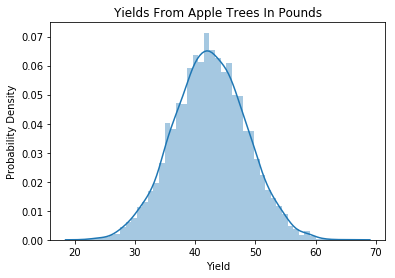

In [3]:
# Create a plot
plt.title('Yields From Apple Trees In Pounds')
plt.ylabel('Probability Density')
sns.distplot(df.Yield);

In [4]:
# Your comments about the data here
# the data follows a normal distribution. The dataframe consists of one column containing yeilds

## Briefly explain what each value represents in this data set**

In [5]:
# Your answer here
# The dataframe consists of one column conaining yeilds of apple trees in pounds. The visualization is 
# a Probability Density Function showing probability densities pn the y axis and apple yeilds in the 
# x axis

## Define the interval bounds where such that the range contains 99% of the observations   

> **Hint**: Recall the empirical rule related to $3\sigma$.

In [6]:
def z_scores(X):
    mu = np.mean(X)
    sigma = np.std(X)
    S = [(i - mu)/sigma for i in X]
    return S

def reverse_z_scores(S, mu, sigma):
    X = [mu + sigma*i for i in S]
    return X

In [7]:
# method 1
standard_normal = z_scores(df.Yield)
percent_99_standard = [x for x in standard_normal if (x < 3) and (x > -3)]
original_percent_99 = reverse_z_scores(percent_99_standard, df.Yield.mean(), df.Yield.std())
minimum = np.min(original_percent_99)
maximum = np.max(original_percent_99)

In [8]:
print(minimum, '\n', maximum)

24.614502579261718 
 60.389343509241854


In [9]:
# method 2
mu = df.Yield.mean()
sigma = df.Yield.std()
new_df = df[(df['Yield'] < mu + 3*sigma) & (df['Yield'] > mu - 3*sigma)]
minimum = new_df.min()
maximum = new_df.max()

In [10]:
print(minimum, '\n', maximum)

Yield    24.616282
dtype: float64 
 Yield    60.387545
dtype: float64


In [11]:
# Write your answer here 
# range where 99% fall is 24.6162 to 60.3875 pounds

## Compute and interpret the z-score for a tree yielding 35 pounds of apples

In [12]:
# Calculate z
mu = df.Yield.mean()
sigma = df.Yield.std()
z_score = (35 - mu)/sigma
z_score

-1.2338438246808463

In [15]:
# Interpret the result
# the tree yielding 35 pounds is below 84 percent of trees. It is in the bottom 16 percent.
# It has a low yield

## Suppose a tree has a z-score of 1.85. Interpret this z-score. What is the yield of this tree?

In [16]:
# Interpret the z score
# the tree is above 84 percent of the trees. It has an especially high yield

In [18]:
# Calculate yield
apple_yield = 1.85 * sigma + mu

In [19]:
# What is the yield ?
apple_yield
# 53.514

53.51446239172822

##  Convert each tree’s yield to a z-score so the new variable is the “z-score for weight”

The units are still the apple trees. For the data set of all z-scores:

* What is the shape? 
* The mean? 
* The standard deviation?

In [23]:
# Give your solution here 
standard_normal_df = pd.DataFrame(z_scores(df.Yield))
standard_normal_df.columns = ['Z_score_for_weight']
standard_normal_df.head()

,Z_score_for_weight
0,-0.444169
1,-0.422377
2,0.320425
3,0.698473
4,-0.285293


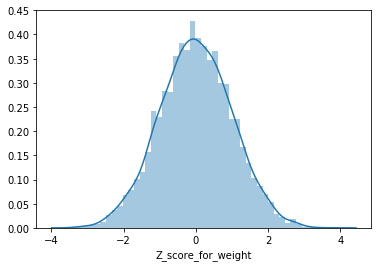

In [25]:
sns.distplot(standard_normal_df['Z_score_for_weight']);

In [26]:
# Your observations
# The data appears to follow a standard normal distribution

## Summary

In this lab, you practiced your knowledge on the standard normal distribution!